# Simulation des Doppler-Effekt 
<!-- Jaromir Nitsch -->

#### Prerequisites

In [11]:
# %pip install -q ipywidgets
# %pip install -q matplotlib
# %pip install -q numpy
# %pip install -q scipy

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import write
from IPython.lib.display import Audio

%matplotlib notebook
%matplotlib inline

#### Einrichten der Simulation

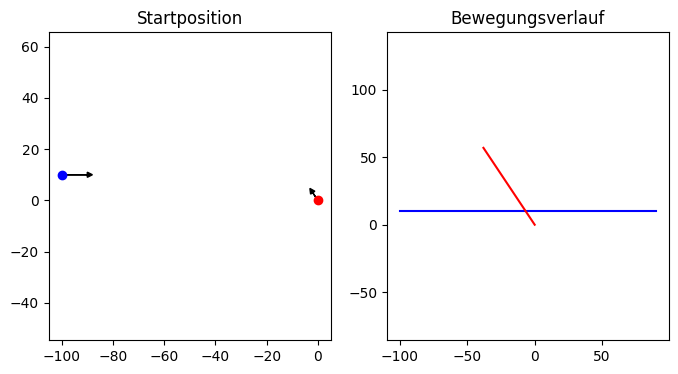

In [13]:
from doppler_sound import simulation

my_sim = simulation(sound_speed=343, sim_frequency=200)
my_sim.setup_observer(x = 0, y = 0, velocity= (-2,3))
my_sim.setup_source(x = -100, y = 10, velocity= (10,0))
my_sim.plot_Scene()

#### Bestimmung des Dopplershifts

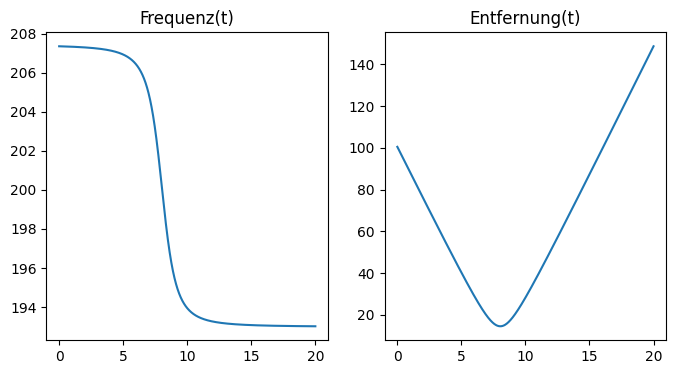

In [14]:
f = my_sim.calc_frqCurve((0, 20), 0.0001)
dist = my_sim.calc_totalDistance((0, 20), 0.0001)
my_sim.plot_((f, dist),("Frequenz(t)", "Entfernung(t)"), (0, 20), 0.0001)

#### Berechnung der Ungenauigkeit

Differenz von zwei nacheinander aufgenommenen Frequenzen.
Je geringer, desto besser.

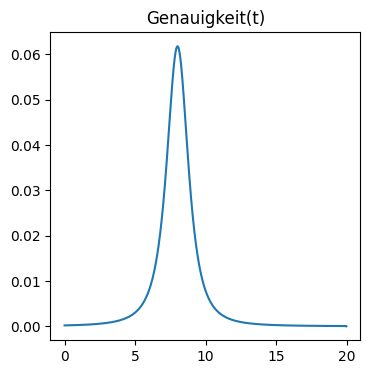

In [15]:
error = my_sim.calc_Error((0,20), 0.01)
my_sim.plot(error,"Genauigkeit(t)",(0,20), 0.01)

#### Die Amplitude

Je nach Entfernung des Senders zum Empfänger, ist die Amplitude größer oder kleiner.
Es gilt der Zusammenhang: a proportional zu 1/r, wobei a die Amplitude und r die Entfernung ist. 

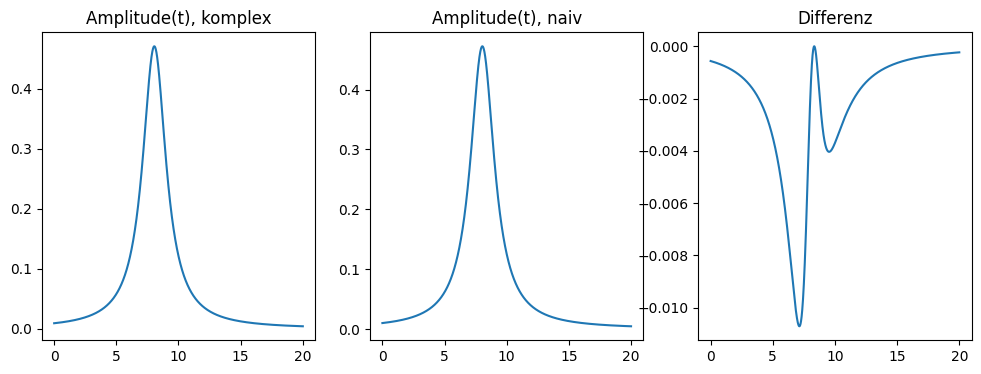

In [16]:
a1 = my_sim.calc_Amplitude((0,20), 0.0001)
a2 = my_sim.calc_Amplitude2((0,20), 0.0001)
dif = [100*a1[i]-100*a2[i] for i in range(len(a1))]
my_sim.plot_((100*a1,100*a2, dif),("Amplitude(t), komplex","Amplitude(t), naiv", "Differenz"), (0,20), 0.0001)

### Von der Frequenz zum Ton

Um aus dem Frequenzverlauf einen Ton zu genenerieren, muss man einen Blick auf die Sinusfunktion werfen.
Wendet man diese auf die Gerade $y = m\cdot x$ an, erhält man den Graph der Funktion $f(x) = sin(m\cdot x)$ mit der Frequenz $f = \frac{m}{2\pi}$.

Will man also eine Welle mit einer bestimmten Frequenz $f$ erzeugen, wendet man die Sinusfunktion auf die Gerade
$y = 2\pi f\cdot x$ an.

Um nun einen Frequenzverlauf abszubilden, muss man die Sinuskurve auf eine Funktion mit einer änderenden Steigung anwenden.
Hat man also die Kurve des Frequenzverlaufs, muss die Sinuskurve auf die Stammfunktion des Frequenzverlaufs anwenden, um den entsprechenden Ton zu erzeugen.

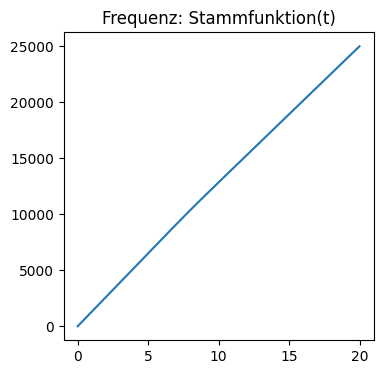

In [17]:
shift = my_sim.calc_FrequencyShift((0,20), 0.0001)
my_sim.plot(shift, "Frequenz: Stammfunktion(t)", (0,20), 0.0001)

In [18]:
wave = np.sin(shift)

Audio(rate = int(1/0.0001), data = wave*a1)

#### Speichern des Audios

Um die Datei weiter zu analysieren, eignet sich Audacity. Dies erleichtert es um z.B. das Spectrogramm oder die Welle besser zu analysieren.

In [19]:
display(write("shift1.wav", int(1/0.0001), 100*wave*a1))

None

## Ausblick

Die Fehlerkurve kann durch dynamisches Anpassen der Genauigkeit verbessert werden, um bessere Ergebnisse zu erzielen.
Dies hätte gleichzeitig den Vorteil, den Rechenaufwand sinnvoller zu verteilen und an Stellen hoher Frequenzänderung genauer zu messen. Eine ideale Messung, hätte keine Hochpunkte, sondern wäre eine Gerade ohne Steigung.

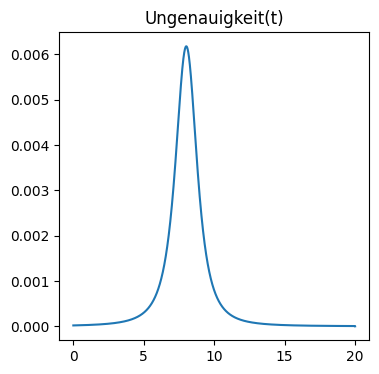

In [20]:
error = my_sim.calc_Error((0,20),0.001)
my_sim.plot(error, "Ungenauigkeit(t)", (0,20),0.001)

Im momentanen Zustand ist es nur möglich, eine bestimmte Frequenz zu manipulieren, doch ist es ebenso denkbar das Programm so zu erweitern, das man den Dopplereffekt anhand einer Audio-Datei simuliert und mit realitätsnäheren Geräuschen arbeitet (Martinshorn, Motorengeräusch).

Ebenso ist es denkbar auch neben den momentan konstanten Geschwindigkeiten, die Simulation mit Beschleunigung und Geschwindigkeitsverläufen zu erweitern.